## Make operations with Dataframes and visualizations

In this chapter we will remember

 - Calculate measures by categorical dimensions using groupby and pivot tables
 - Create visualizations

**You have exercises to complete along the entore notebook**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
states = pd.read_csv('/content/drive/MyDrive/USC Upstate/IronHack/Prework/DATA/data/states.csv', sep = ';')
states.head(3)

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount,Date
0,RB50392,Washington,NaN,Master,NaN,0,1000,00/01/1900,Personal Auto,Four-Door Car,2.704934,30/10/1995
1,QZ44356,Arizona,F,Bachelor,69795359%,0,94,00/01/1900,Personal Auto,Four-Door Car,1131.464935,02/12/1998
2,AI49188,Nevada,F,Bachelor,128874317%,48767,108,00/01/1900,Personal Auto,Two-Door Car,566.472247,16/05/1997


## Calculate the addition and mean for income by gender

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://realpython.com/pandas-groupby/



First we are going to see how is our type of data in Gender

In [ ]:
states['GENDER'].value_counts()

F         457
M         413
Male       39
female     28
Femal      17
Name: GENDER, dtype: int64

We can see that there exits some issues.
We are going to replace:


*   'Male' -> 'M'
*   'female' and 'Femal' -> 'F'



In [ ]:
states.replace(['female', 'Femal'], 'F', inplace=True)
states.replace('Male', 'M', inplace=True)

In [ ]:
states['GENDER'].value_counts()

F    502
M    452
Name: GENDER, dtype: int64

In [ ]:
df_mean= states.groupby(['GENDER']).mean()

<ipython-input-7-c25cc6376f35>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean= states.groupby(['GENDER']).mean()


In [ ]:
df_sum= states.groupby(['GENDER']).sum()

<ipython-input-8-9e7e40041bb4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum= states.groupby(['GENDER']).sum()


In [ ]:
solution = pd.concat([df_mean['Income'], df_sum['Income']], axis=1)

In [ ]:
solution

,Income,Income
GENDER,,
F,39388.111554,19772832
M,39784.517699,17982602


In [ ]:
solution = states.groupby('GENDER')['Income'].agg(['mean', 'sum'])

### Calculate the addition and mean for income by gender and civil state




In [ ]:
states.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount', 'Date'],
      dtype='object')

It doesn't exist civil_state, we do it with education

In [ ]:
solution2 = states.groupby(['GENDER', 'Education'])['Income'].agg(['mean', 'sum'])

In [ ]:
solution2

mean      sum
GENDER Education                                  
F      Bachelor              40954.563380  5815548
       Bachelors             91137.000000   182274
       College               40290.182432  5962947
       Doctor                48504.562500   776073
       High School or Below  30853.226027  4504571
       Master                52737.895833  2531419
M      Bachelor              39951.957746  5673178
       Bachelors             75751.000000   378755
       College               36039.816794  4721216
       Doctor                40218.315789   764148
       High School or Below  38563.058824  4589004
       Master                51563.916667  1856301

## Show in the screen the main indicators for numerical variables

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html



In [ ]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   int64  
 6   Monthly Premium Auto       1071 non-null   int64  
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
 11  Date                       1071 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 100.5+ KB


We have three numeric features: `Income`, `Monthly Premium Auto` and `Total Claim Amount`

In [ ]:
states.describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


### Show the percentiles 55, 65 and 85

In [ ]:
states.quantile(0.55)

<ipython-input-17-828a71253935>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  states.quantile(0.55)


Income                  41801.5000
Monthly Premium Auto       88.0000
Total Claim Amount        393.1182
Name: 0.55, dtype: float64

In [ ]:
states.quantile(0.65)

<ipython-input-18-00875d16fdbe>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  states.quantile(0.65)


Income                  52874.0
Monthly Premium Auto       99.5
Total Claim Amount        470.4
Name: 0.65, dtype: float64

In [ ]:
states.quantile(0.85)

<ipython-input-19-03698d34c105>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  states.quantile(0.85)


Income                  76334.000000
Monthly Premium Auto      117.000000
Total Claim Amount        639.285052
Name: 0.85, dtype: float64

## Using pivot tables, calculate the addition and mean for income by gender

https://builtin.com/data-science/pandas-pivot-tables

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [ ]:
sol_add = pd.pivot_table(states, values = 'Income', index = 'GENDER', aggfunc="sum")
sol_mean = pd.pivot_table(states, values = 'Income', index = 'GENDER', aggfunc="mean")

In [ ]:
solution = pd.concat([sol_add, sol_mean] , axis=1)

In [ ]:
solution.columns= ['Total Income', 'Mean Income']

In [ ]:
solution

,Total Income,Mean Income
GENDER,,
F,19772832,39388.111554
M,17982602,39784.517699


## Visualizations


In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Draw a barplot by specie

 - What represents the vertical axis?
 The vertical axis represent the total number of species.
 - Write and run a code that outputs the plot below

We have already import Matplotlib. This is on of existing libraries used for data visualization.

In [ ]:
species= penguins['species'].value_counts()

In [ ]:
species

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

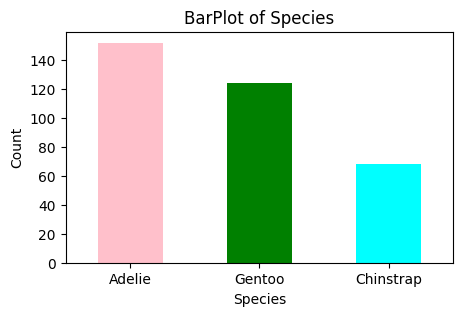

In [ ]:
plt.figure(figsize=(5, 3))

species.plot(kind = 'bar', color=['pink', 'green', 'cyan'])


#We add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('BarPlot of Species')

# Show the plot
plt.xticks(rotation=0)  # We rotate the x-sticks for better readability
plt.show()

### Draw a histogram

 - Which is the difference between histogram and barplot?
 Barplot are for categorical data and histogram for continuous data.
 - Write and run a code that outputs the plot below

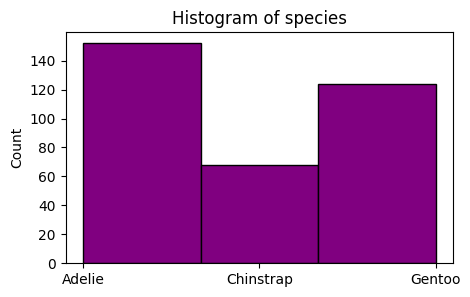

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(penguins['species'], bins=3,  color='purple', edgecolor='black')
plt.ylabel('Count')
plt.title('Histogram of species')
plt.show()

### More histograms


 - Write and run a code that outputs the plot below
 - Output a new histogram with only 5 bars

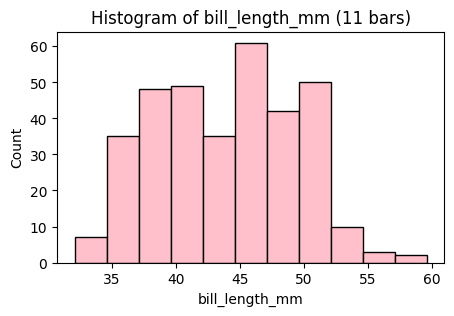

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(penguins['bill_length_mm'], bins=11,  color='pink', edgecolor='black')
plt.ylabel('Count')
plt.xlabel('bill_length_mm')
plt.title('Histogram of bill_length_mm (11 bars)')
plt.show()

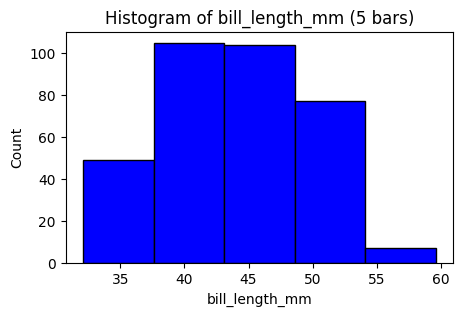

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(penguins['bill_length_mm'], bins=5,  color='blue', edgecolor='black')
plt.ylabel('Count')
plt.xlabel('bill_length_mm')
plt.title('Histogram of bill_length_mm (5 bars)')
plt.show()

### Scatter plots

 - What does represent each data point? It represent the relationship or correlation between two variables
 - Write and run a code that outputs the plots below

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

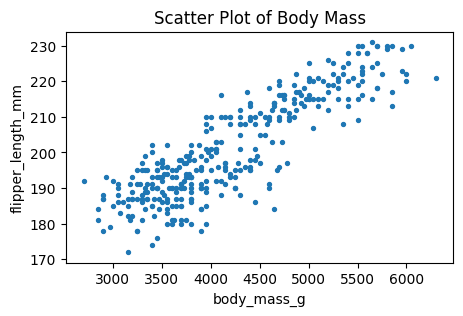

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(penguins['body_mass_g'],penguins['flipper_length_mm'], s=8)
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.title('Scatter Plot of Body Mass')
plt.show()

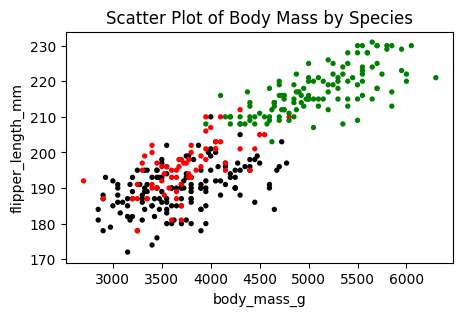

In [ ]:
# Define a color for each species
color_mapping = {
    'Adelie': 'black',
    'Gentoo': 'green',
    'Chinstrap': 'red'
}
plt.figure(figsize=(5, 3))
plt.scatter(penguins['body_mass_g'], penguins['flipper_length_mm'], s=8, c=penguins['species'].map(color_mapping))
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.title('Scatter Plot of Body Mass by Species')
plt.show()

### Lineplot

 - Lineplots are suitable for which type of data?  are suitable for visualizing in continuous data or data with an inherent order, such as time series data or data with sequential values.
 - Write and run a code that outputs the plot below

In [ ]:
stocks = pd.read_csv('/content/drive/MyDrive/USC Upstate/IronHack/Prework/DATA/data/stocks.csv', sep = ';')
stocksMMM = stocks[(stocks['ccode'] == 'MMM') & (stocks['Date'] <= '2021-01-30')]
stocksMMM

,id,Date,Open,High,Low,Close,Volume,ccode
0,0,2020-12-31,167.1,167.9,166.2,167.8,1841300,MMM
1,1,2021-01-04,168.0,169.1,163.7,165.0,2996200,MMM
2,2,2021-01-05,165.1,166.3,163.8,164.7,2295300,MMM
3,3,2021-01-06,165.8,168.5,165.2,167.2,3346400,MMM
4,4,2021-01-07,164.7,166.5,159.5,162.9,5863400,MMM
5,5,2021-01-08,162.4,162.8,158.0,159.9,4808100,MMM
6,6,2021-01-11,159.4,160.4,158.4,158.6,2736600,MMM
7,7,2021-01-12,159.3,160.5,157.5,159.8,2949100,MMM
8,8,2021-01-13,160.6,161.0,159.4,159.6,2098000,MMM
9,9,2021-01-14,160.6,160.7,158.6,159.7,2895400,MMM


Text(0, 0.5, 'Close')

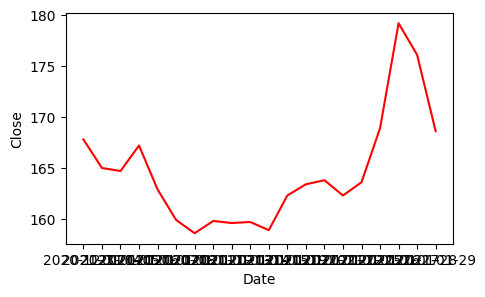

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(stocksMMM['Date'], stocksMMM['Close'], color = 'red')
plt.xlabel('Date')
plt.ylabel('Close')

### Boxplot


 - Can you describe the different parts of the boxplot?

1.   **Box**: The central rectangle represents the interquartile range (IQR), indicating the spread of the middle 50% of the data.
2.  **Whiskers**: Lines extending from the box show the range of the data, often with upper and lower bounds. Whiskers typically reach a specified range from the quartiles.
3.  **Median**: A horizontal line inside the box represents the median, the middle value in the dataset.
4.  **Outliers**: Data points outside the whiskers' range are shown as individual dots and may signify extreme values.

*  Code the plot below
*  Which is the relationship between the boxplot and the table below?
1. A **boxplot** is a graphical tool that provides a visual summary of the distribution, highlighting key features like the median, quartiles, and potential outliers.

2. The **describe**() method generates a table of summary statistics and is more suitable for obtaining a detailed numerical overview of the data.

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


First I have to eliminate all the null values

In [ ]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
penguins = penguins.dropna()

In [ ]:
penguins.reset_index(drop=True, inplace=True)

In [ ]:
# Define custom colors for the box, whiskers, and outliers
box_color = 'lightblue'
whisker_color = 'blue'
outlier_color = 'red'

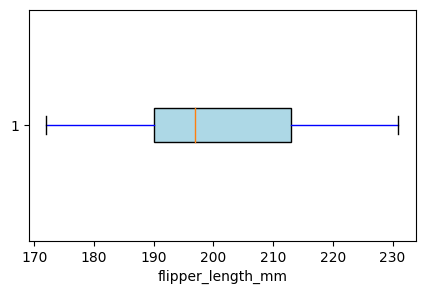

In [ ]:
plt.figure(figsize=(5, 3))
plt.boxplot(penguins['flipper_length_mm'], vert=False, patch_artist=True, boxprops={'facecolor': box_color},
            whiskerprops={'color': whisker_color})
plt.xlabel('flipper_length_mm')
plt.show()

In [ ]:
penguins[['flipper_length_mm','body_mass_g']].describe()

,flipper_length_mm,body_mass_g
count,333.000000,333.000000
mean,200.966967,4207.057057
std,14.015765,805.215802
min,172.000000,2700.000000
25%,190.000000,3550.000000
50%,197.000000,4050.000000
75%,213.000000,4775.000000
max,231.000000,6300.000000
